In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [8]:
df = pd.read_csv('data-04-zoo.csv', header = None)

In [13]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

In [14]:
x_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
y_data

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: 16, Length: 101, dtype: int64

# One-hot Encoding

In [29]:
nb_class = y_data.unique().size

In [32]:
# np.eye() : 대각행렬 
y_onehot = np.eye(nb_class)[np.array(y_data)-1]

In [33]:
y_onehot.shape

(101, 7)

In [35]:
X = tf.placeholder(tf.float32, shape=[None, 16])
Y = tf.placeholder(tf.float32, shape=[None, nb_class])

In [36]:
W = tf.Variable(tf.random_normal([16, nb_class]))
b = tf.Variable(tf.random_normal([nb_class]))

In [37]:
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

In [39]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [40]:
train = optimizer.minimize(cost)

In [44]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [46]:
epochs = range(2000)
for epoch in epochs:
    sess.run(train, feed_dict={X:x_data, Y:y_onehot})

In [47]:
pred = sess.run(hypothesis, feed_dict={X:x_data})

In [48]:
# 7종류일 확률
pred

array([[9.74973679e-01, 1.59431994e-03, 6.44398527e-03, 2.42487105e-04,
        1.43625555e-04, 1.37159750e-02, 2.88584223e-03],
       [9.62699592e-01, 6.92324433e-03, 1.88066531e-02, 2.92656990e-03,
        2.14396045e-03, 5.92410332e-03, 5.75909857e-04],
       [1.08865350e-02, 2.15824395e-02, 3.73708978e-02, 8.63526940e-01,
        4.33587991e-02, 2.36575678e-03, 2.09086202e-02],
       [9.74973679e-01, 1.59431994e-03, 6.44398527e-03, 2.42487105e-04,
        1.43625555e-04, 1.37159750e-02, 2.88584223e-03],
       [9.72234309e-01, 5.72344707e-03, 1.20095275e-02, 2.26248242e-03,
        6.71719317e-04, 4.59931837e-03, 2.49925535e-03],
       [9.62699592e-01, 6.92324433e-03, 1.88066531e-02, 2.92656990e-03,
        2.14396045e-03, 5.92410332e-03, 5.75909857e-04],
       [9.70583558e-01, 5.70700970e-03, 1.81046221e-02, 9.61109996e-04,
        2.60539469e-04, 4.24077781e-03, 1.42298159e-04],
       [2.28442959e-02, 4.52353097e-02, 1.18419595e-01, 7.71063447e-01,
        3.53499800e-02, 4

In [51]:
np.argmax(pred[12:13,:])

3

In [52]:
np.apply_along_axis(np.argmax, 1, pred) + 1

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 7, 6, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 2, 7, 1, 1, 2, 2, 2, 2, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 5, 4, 1, 1, 2, 7, 2, 2, 4, 1, 4, 2, 1, 7, 4, 2,
       6, 6, 3, 7, 4, 1, 1, 2, 1, 6, 1, 1, 2])

In [53]:
y_data.values

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

## Train / Test data로 나누기

In [54]:
df = pd.read_csv('data-04-zoo.csv', header = None)

In [57]:
# one-hot으로 만들기
nb_class = df.iloc[:,-1].unique().size
y_onehot = np.eye(nb_class)[np.array(df.iloc[:, -1])-1]

In [69]:
# choice(101,101) : 0부터 100까지, 101개를 뽑아오겠다, replace: 중복
rand_idx = np.random.choice(101, 101, replace = False)

In [70]:
# 80개를 train으로, 20개를 test data로
# 랜덤값을 위에서 고정하고 나눔
tr_idx = rand_idx[0:80]
te_idx = rand_idx[80:]

In [72]:
train_x = df.iloc[tr_idx,:-1]
train_y = y_onehot[tr_idx]
test_x = df.iloc[te_idx,:-1]
test_y = y_onehot[te_idx]

In [73]:
X = tf.placeholder(tf.float32, shape=[None, 16])
Y = tf.placeholder(tf.float32, shape=[None, nb_class])

In [74]:
W = tf.Variable(tf.random_normal([16, nb_class]))
b = tf.Variable(tf.random_normal([nb_class]))

In [75]:
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

In [76]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [77]:
train = optimizer.minimize(cost)

In [78]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [79]:
epochs = range(2000)
for epoch in epochs:
    sess.run(train, feed_dict={X:train_x, Y:train_y})

In [81]:
pred = sess.run(hypothesis, feed_dict={X:test_x})

In [82]:
np.apply_along_axis(np.argmax, 1, pred) + 1

array([2, 1, 2, 4, 4, 1, 1, 1, 3, 1, 6, 4, 4, 1, 4, 2, 1, 1, 4, 1, 1])

In [84]:
df.iloc[te_idx,-1].values

array([2, 1, 2, 4, 4, 1, 1, 1, 3, 1, 6, 4, 4, 1, 4, 2, 1, 1, 4, 1, 1])

In [86]:
df.iloc[te_idx,-1].values == (np.apply_along_axis(np.argmax, 1, pred) + 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [89]:
accuracy = df.iloc[te_idx,-1].values == (np.apply_along_axis(np.argmax, 1, pred) + 1)
accuracy = sum(accuracy)
accuracy = accuracy/df.iloc[te_idx, -1].values.size
accuracy

1.0

## epoch 마다 accuracy 확인하기

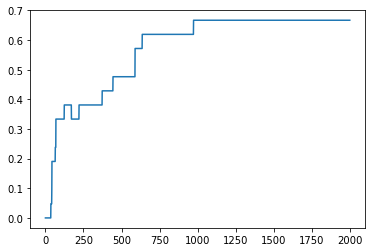

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('data-04-zoo.csv', header = None)

# one-hot으로 만들기
nb_class = df.iloc[:,-1].unique().size
y_onehot = np.eye(nb_class)[np.array(df.iloc[:, -1])-1]

# choice(101,101) : 0부터 100까지, 101개를 뽑아오겠다, replace: 중복
rand_idx = np.random.choice(101, 101, replace = False)

# 80개를 train으로, 20개를 test data로
# 랜덤값을 위에서 고정하고 나눔
tr_idx = rand_idx[0:80]
te_idx = rand_idx[80:]

train_x = df.iloc[tr_idx,:-1]
train_y = y_onehot[tr_idx]
test_x = df.iloc[te_idx,:-1]
test_y = y_onehot[te_idx]

X = tf.placeholder(tf.float32, shape=[None, 16])
Y = tf.placeholder(tf.float32, shape=[None, nb_class])

W = tf.Variable(tf.random_normal([16, nb_class]))
b = tf.Variable(tf.random_normal([nb_class]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

acc_rate = []
epochs = range(2000)
for epoch in epochs:
    sess.run(train, feed_dict={X:train_x, Y:train_y})
    pred = sess.run(hypothesis, feed_dict={X:test_x})
    pred = np.apply_along_axis(np.argmax, 1, pred) + 1
    accuracy = df.iloc[te_idx,-1].values == pred
    accuracy = sum(accuracy)
    accuracy = accuracy/df.iloc[te_idx, -1].values.size
    acc_rate.append(accuracy)
   
plt.plot(epochs,acc_rate)